In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import os

### 1. Gas Station Brands per Zip Code
Exploring to see if gas station brands have any trends per zip code

In [2]:
extra_clean_gas = pd.read_csv("Resources/extra_clean_gas.csv")
extra_clean_gas = extra_clean_gas.drop('Unnamed: 0', axis=1)
extra_clean_gas


,business,zip code,address,gas1 currency,gas1 type,gas1 price,gas1 pricetag,gas1 unit,gas1 updated,gas2 currency,...,gas2 price,gas2 pricetag,gas2 unit,gas2 updated,gas3 currency,gas3 type,gas3 price,gas3 pricetag,gas3 unit,gas3 updated
0,Shell,92101,"1011 A St, San Diego, CA 92101",USD,Regular,7.0,$7.00,gallon,2023-10-03T09:20:18.000Z,USD,...,7.11,$7.11,gallon,2023-10-02T19:38:42.000Z,USD,Premium,7.20,$7.20,gallon,2023-10-02T13:26:42.000Z
1,Shell,92123,"2777 Health Center Dr, San Diego, CA 92123",USD,Regular,7.0,$7.00,gallon,2023-10-02T15:59:32.000Z,USD,...,7.20,$7.20,gallon,2023-10-02T19:28:22.000Z,USD,Premium,7.30,$7.30,gallon,2023-10-02T19:28:22.000Z
2,Texas Street Valero,92116,"4616 Texas St, San Diego, CA 92116",USD,Regular,6.4,$6.40,gallon,2023-10-03T05:53:19.000Z,USD,...,6.60,$6.60,gallon,2023-10-03T05:53:19.000Z,USD,Premium,6.80,$6.80,gallon,2023-10-03T05:53:19.000Z
3,Chevron,92117,"7070 Clairemont Mesa Blvd, San Diego, CA 92117",USD,Regular,6.3,$6.30,gallon,2023-10-03T09:15:59.000Z,USD,...,6.50,$6.50,gallon,2023-10-03T09:15:59.000Z,USD,Premium,6.60,$6.60,gallon,2023-10-03T09:15:59.000Z
4,Laurel Pacific Gas (Valero),92101,"2499 Pacific Hwy, San Diego, CA 92101",USD,Regular,6.8,$6.80,gallon,2023-10-03T09:17:23.000Z,USD,...,6.90,$6.90,gallon,2023-10-02T05:37:50.000Z,USD,Premium,7.00,$7.00,gallon,2023-10-02T10:00:45.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,76,92071,"8617 Cuyamaca St Suite #1, Santee, CA 92071",USD,Regular,6.1,$6.10,gallon,2023-10-03T11:43:54.000Z,USD,...,6.30,$6.30,gallon,2023-10-02T07:28:48.000Z,USD,Premium,6.40,$6.40,gallon,2023-10-03T10:10:15.000Z
155,Qwik Korner,92071,"9035 Mission Gorge Rd, Santee, CA 92071",USD,Regular,6.0,$6.00,gallon,2023-10-03T12:11:44.000Z,USD,...,6.20,$6.20,gallon,2023-10-02T08:29:41.000Z,USD,Premium,6.40,$6.40,gallon,2023-10-02T08:29:41.000Z
156,Mobil,92071,"9750 Magnolia Ave, Santee, CA 92071",USD,Regular,6.2,$6.20,gallon,2023-10-03T12:01:37.000Z,USD,...,6.40,$6.40,gallon,2023-10-03T12:01:37.000Z,USD,Premium,6.60,$6.60,gallon,2023-10-03T12:01:37.000Z
157,76,92071,"10219 Mast Blvd, Santee, CA 92071",USD,Regular,6.2,$6.20,gallon,2023-10-03T03:16:55.000Z,USD,...,6.40,$6.40,gallon,2023-10-01T15:12:11.000Z,USD,Premium,6.55,$6.55,gallon,2023-10-01T15:12:11.000Z


In [54]:
# Extract the 'business' column as a list
brand_name1 = extra_clean_gas['business'].to_list()

# Create an empty list to store the modified names
new_brand_name = []

# Create a list of words to search for
brands_to_check = ['76', 'ARCO', 'Chevron', 'Exxon', 'Flyers', 'Valero', 'Mobil', 'Qwik Korner', 'Shell', 'Sinclair', 'Speedway', 'United', 'Vons Fuel Station']

# Iterate over the list of names
for bname in brand_name1:
    # Check if the name contains any of the words to search for
    if any(brand in bname for brand in brands_to_check):
        # Rename the name to just the word
        new_name = [brand for brand in brands_to_check if brand in bname][0]
    else:
        new_name = bname

    # Add the new name to the list
    new_brand_name.append(new_name)

print(new_brand_name)
extra_clean_gas['Brand Name'] = new_brand_name


['Shell', 'Shell', 'Valero', 'Chevron', 'Valero', 'ARCO', 'Shell', 'Speedway', 'Shell', 'Chevron', 'Speedway', 'Chevron', 'Shell', 'Mobil', 'Exxon', 'Chevron', 'Chevron', 'Chevron', 'Shell', 'Chevron', 'Hazard Center Auto Mart', 'Shell', 'Chevron', 'Shell', 'Shell', '76', 'Chevron', '76', 'ARCO', 'Chevron', 'Chevron', 'Vons Fuel Station', 'Shell', 'Shell', 'Shell', 'Ultra Gas', 'Mobil', 'Tierrasanta Gas Station', 'ARCO', 'ARCO', 'Fast Fuel Car Care Center', 'ARCO', 'ARCO', 'Chevron', 'Shell', '76', 'Valero', 'Mobil', 'Shell', 'J & R Gas and Mini Mart', 'United', 'Chevron', 'ARCO', 'Valero', 'ARCO', '76', 'Petromerica', 'Chevron', 'ARCO', 'Shell', 'Chevron', 'ARCO', 'Speedway', 'Chevron', 'Chevron', 'Shell', 'Bay Park Fuel', '76', 'Shell', 'Chevron', 'Good Point Gasoline', 'Shell', 'ARCO', 'Chevron', 'Chevron', 'Chevron', 'Shell', 'Shell', 'Shell', 'Mobil', 'Shell', 'ARCO', 'Shell', 'Fashion Valley Gas', 'Summit Gasoline', 'Thrifty', '76', 'Shell', 'Chevron', '76', 'Shell', 'Chevron', '

In [55]:
new_cols = ['Brand Name', 'business', 'zip code', 'address', 'gas1 currency', 'gas1 type',
       'gas1 price', 'gas1 pricetag', 'gas1 unit', 'gas1 updated',
       'gas2 currency', 'gas2 type', 'gas2 price', 'gas2 pricetag',
       'gas2 unit', 'gas2 updated', 'gas3 currency', 'gas3 type', 'gas3 price',
       'gas3 pricetag', 'gas3 unit', 'gas3 updated']

extra_clean_gas_w_brand = extra_clean_gas[new_cols]
extra_clean_gas_w_brand.head()

,Brand Name,business,zip code,address,gas1 currency,gas1 type,gas1 price,gas1 pricetag,gas1 unit,gas1 updated,...,gas2 price,gas2 pricetag,gas2 unit,gas2 updated,gas3 currency,gas3 type,gas3 price,gas3 pricetag,gas3 unit,gas3 updated
0,Shell,Shell,92101,"1011 A St, San Diego, CA 92101",USD,Regular,7.0,$7.00,gallon,2023-10-03T09:20:18.000Z,...,7.11,$7.11,gallon,2023-10-02T19:38:42.000Z,USD,Premium,7.2,$7.20,gallon,2023-10-02T13:26:42.000Z
1,Shell,Shell,92123,"2777 Health Center Dr, San Diego, CA 92123",USD,Regular,7.0,$7.00,gallon,2023-10-02T15:59:32.000Z,...,7.20,$7.20,gallon,2023-10-02T19:28:22.000Z,USD,Premium,7.3,$7.30,gallon,2023-10-02T19:28:22.000Z
2,Valero,Texas Street Valero,92116,"4616 Texas St, San Diego, CA 92116",USD,Regular,6.4,$6.40,gallon,2023-10-03T05:53:19.000Z,...,6.60,$6.60,gallon,2023-10-03T05:53:19.000Z,USD,Premium,6.8,$6.80,gallon,2023-10-03T05:53:19.000Z
3,Chevron,Chevron,92117,"7070 Clairemont Mesa Blvd, San Diego, CA 92117",USD,Regular,6.3,$6.30,gallon,2023-10-03T09:15:59.000Z,...,6.50,$6.50,gallon,2023-10-03T09:15:59.000Z,USD,Premium,6.6,$6.60,gallon,2023-10-03T09:15:59.000Z
4,Valero,Laurel Pacific Gas (Valero),92101,"2499 Pacific Hwy, San Diego, CA 92101",USD,Regular,6.8,$6.80,gallon,2023-10-03T09:17:23.000Z,...,6.90,$6.90,gallon,2023-10-02T05:37:50.000Z,USD,Premium,7.0,$7.00,gallon,2023-10-02T10:00:45.000Z


In [56]:
zip_brand = extra_clean_gas_w_brand.loc[:,['zip code','Brand Name']]
zip_brand.head(100)


,zip code,Brand Name
0,92101,Shell
1,92123,Shell
2,92116,Valero
3,92117,Chevron
4,92101,Valero
...,...,...
95,92128,ARCO
96,92129,Chevron
97,92129,Shell
98,92129,Chevron


In [6]:
counts_per_zip_per_brand = extra_clean_gas_w_brand.groupby(extra_clean_gas_w_brand['zip code'])['Brand Name'].value_counts()
counts_per_zip_per_brand = pd.DataFrame(counts_per_zip_per_brand)
counts_per_zip_per_brand.head()




count
zip code Brand Name              
92014    Chevron                1
         Shell                  1
         Mobil                  1
92025    Vons Fuel Station      1
         Varso Gas Station      1

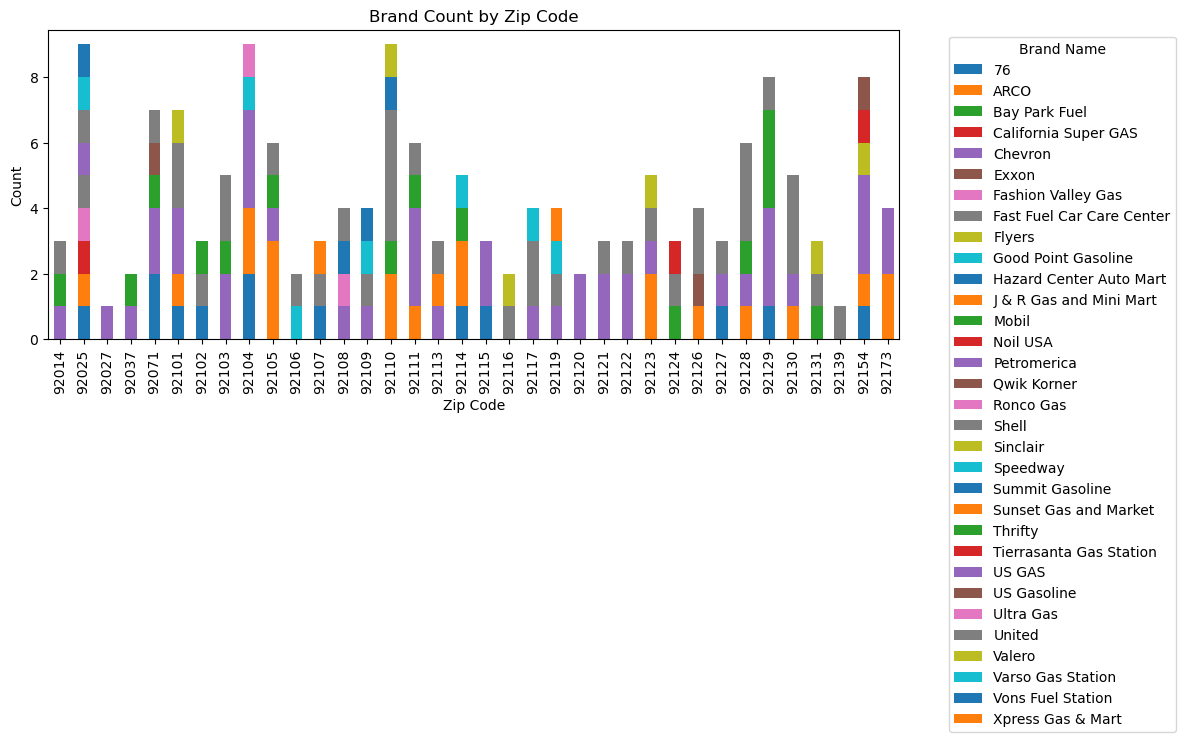

In [8]:
# Group the data by Zip Code and Brand Name and sum the counts
grouped = counts_per_zip_per_brand.groupby(['zip code', 'Brand Name'])['count'].sum().unstack().fillna(0)

# Plot the bar chart
grouped.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Brand Count by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Count')
plt.legend(title='Brand Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 2. Correlation between gas type (reg, mid, super) and Zip Code
Exploring to see if the Zip Code changes the difference between the gas prices.

In [59]:
gas_data_df = pd.read_csv("Resources/Zip Code Data All.csv")
gas_data_df.head()

,Unnamed: 0,zip code,lat,lng,city,population,density,Regular avg,Midgrade avg,Premium avg,Household Income Median
0,0,92014,32.96797,-117.24879,Del Mar,12823.0,785.2,6.193333,6.393333,6.586667,155531
1,1,92025,33.08492,-117.02967,Escondido,50831.0,877.2,5.966667,6.178889,6.327778,58273
2,2,92027,33.13263,-116.98335,Escondido,56878.0,368.0,6.500000,6.700000,6.800000,65989
3,3,92037,32.85257,-117.25104,La Jolla,37505.0,1202.1,6.330000,6.550000,6.680000,109194
4,4,92071,32.85045,-116.99479,Santee,59826.0,1225.5,6.180000,6.402857,6.624286,87334


In [60]:
def linear_regression(x_values,y_values, clr):
    corr = round(st.pearsonr(x_values,y_values)[0],2)
    print(f"The r-squared is : {corr}")
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    line_eq = "y = " + str("{:.2e}".format(slope)) + "x + " + str(round(intercept,2))
    #plt.scatter(x_values,y_values, color = clr)
    plt.plot(x_values,regress_values,color = clr)
    
    return line_eq

The r-squared is : 0.17
The r-squared is : 0.19
The r-squared is : 0.2


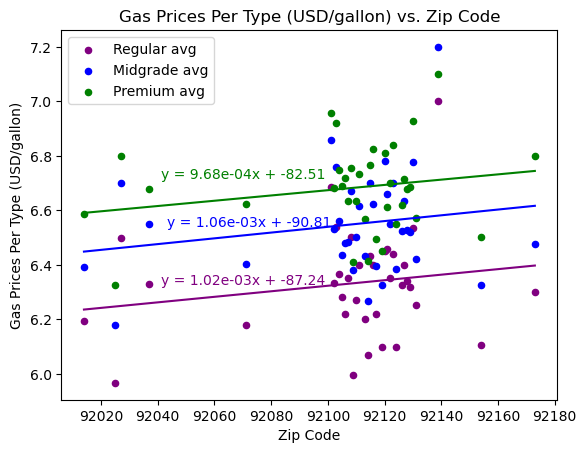

In [61]:
ax = gas_data_df.plot(x = "zip code", y = "Regular avg", kind= "scatter", label = "Regular avg", color = "purple")
gas_data_df.plot(x = "zip code", y = "Midgrade avg", kind= "scatter", label = "Midgrade avg", color = "blue", ax = ax)
gas_data_df.plot(x = "zip code", y = "Premium avg", kind= "scatter", label = "Premium avg", color = "green", ax = ax)

regular = linear_regression(gas_data_df["zip code"],gas_data_df["Regular avg"], "purple")
midgrade = linear_regression(gas_data_df["zip code"],gas_data_df["Midgrade avg"], "blue")
premium = linear_regression(gas_data_df["zip code"],gas_data_df["Premium avg"], "green")

plt.figtext(0.28,0.35, regular,fontsize=10,color="purple")
plt.figtext(0.29,0.47, midgrade,fontsize=10,color="blue")
plt.figtext(0.28,0.57, premium,fontsize=10,color="green")
plt.xlabel("Zip Code")
plt.ylabel("Gas Prices Per Type (USD/gallon)")
plt.title("Gas Prices Per Type (USD/gallon) vs. Zip Code")
plt.show()

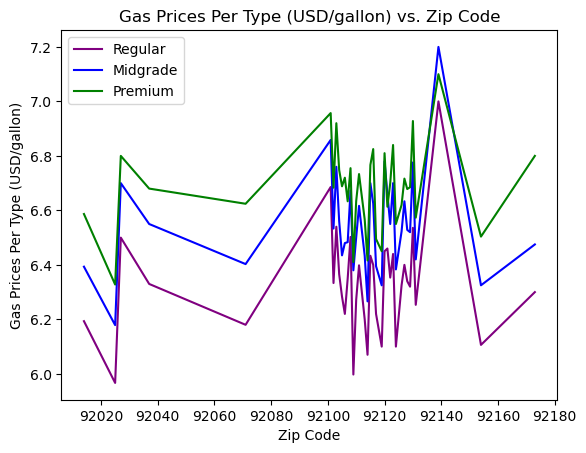

In [62]:
gas_data_df.plot(x= "zip code", y= ["Regular avg", "Midgrade avg", "Premium avg"] , kind= "line", 
                 color= ["purple", "blue", "green"],label = ["Regular", "Midgrade", "Premium"])
plt.xlabel("Zip Code")
plt.ylabel("Gas Prices Per Type (USD/gallon)")
plt.title("Gas Prices Per Type (USD/gallon) vs. Zip Code")
plt.show()

### 3. Density vs Regular Average Gas Price

In [63]:
gas_data_density_df = gas_data_df.sort_values('density')
gas_data_density_df.head()

,Unnamed: 0,zip code,lat,lng,city,population,density,Regular avg,Midgrade avg,Premium avg,Household Income Median
23,23,92121,32.89730,-117.20231,San Diego,4213.0,129.7,6.460000,6.660000,6.613333,107786
32,32,92131,32.89604,-117.05737,San Diego,36070.0,360.4,6.253333,6.420000,6.573333,137500
2,2,92027,33.13263,-116.98335,Escondido,56878.0,368.0,6.500000,6.700000,6.800000,65989
34,34,92154,32.57800,-116.96621,San Diego,85024.0,639.9,6.106250,6.325000,6.503750,66498
0,0,92014,32.96797,-117.24879,Del Mar,12823.0,785.2,6.193333,6.393333,6.586667,155531


The r-squared is : 0.22


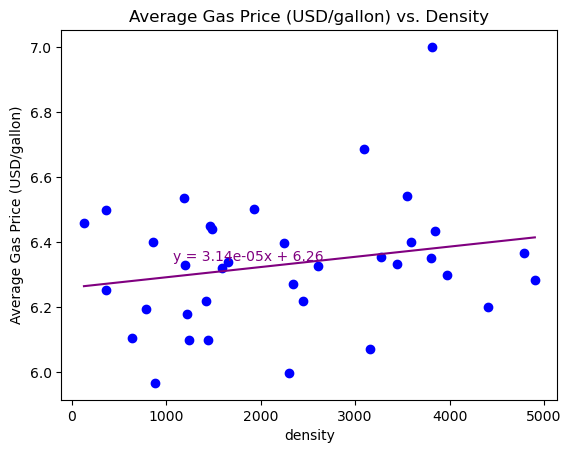

In [64]:
plt.scatter(gas_data_density_df['density'], gas_data_density_df['Regular avg'], c='blue')
plt.xlabel("density")
plt.ylabel("Average Gas Price (USD/gallon)")
plt.title("Average Gas Price (USD/gallon) vs. Density")
density = linear_regression(gas_data_density_df["density"],gas_data_density_df["Regular avg"], "purple")
plt.figtext(0.3,0.4, density,fontsize=10,color="purple")
plt.show()



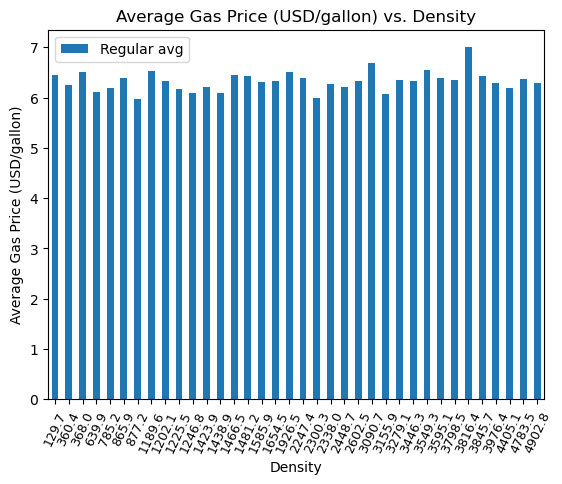

In [65]:
ax = gas_data_density_df.plot(x= "density", y= "Regular avg", rot=65, kind= "bar", width=.5)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9) 
plt.xlabel("Density")
plt.ylabel("Average Gas Price (USD/gallon)")
plt.title("Average Gas Price (USD/gallon) vs. Density")
plt.show()

### 4. Average Gas Price vs. Zip Code

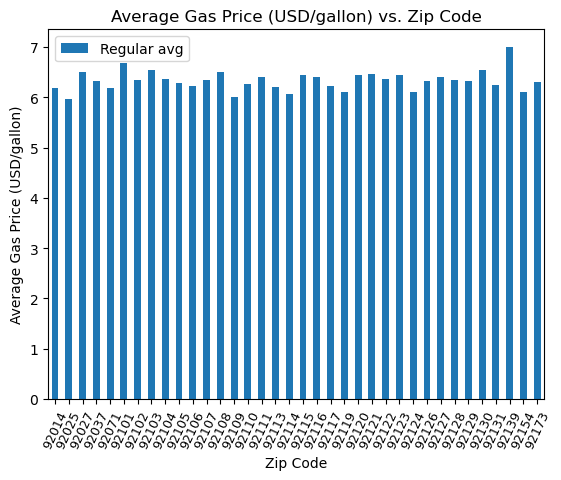

In [66]:
ax = gas_data_df.plot(x= "zip code", y= "Regular avg", rot=65, kind= "bar", width=.5)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9) 
plt.xlabel("Zip Code")
plt.ylabel("Average Gas Price (USD/gallon)")
plt.title("Average Gas Price (USD/gallon) vs. Zip Code")
plt.show()

### 5. Average Gas Price vs. Population

In [91]:
gas_data_income_df = gas_data_df.sort_values('Household Income Median')
gas_data_income_df.head()

,Unnamed: 0,zip code,lat,lng,city,population,density,Regular avg,Midgrade avg,Premium avg,Household Income Median
16,16,92113,32.69591,-117.12012,San Diego,51461.0,4405.1,6.200000,6.433333,6.566667,40310
9,9,92105,32.73756,-117.09193,San Diego,73085.0,4902.8,6.283333,6.435000,6.688333,43282
35,35,92173,32.55552,-117.05114,San Ysidro,29634.0,3976.4,6.300000,6.475000,6.800000,46549
18,18,92115,32.76154,-117.07187,San Diego,61450.0,3845.7,6.433333,6.700000,6.766667,51636
6,6,92102,32.71595,-117.11749,San Diego,40083.0,3446.3,6.333333,6.533333,6.683333,51744


In [84]:
ax = gas_data_income_df(x= "zip code", y= "Regular avg", rot=65, kind= "bar", width=.5)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9) 
plt.xlabel("Zip Code")
plt.ylabel("Average Gas Price (USD/gallon)")
plt.title("Average Gas Price (USD/gallon) vs. Zip Code")
plt.show()

TypeError: 'DataFrame' object is not callable

The r-squared is : -0.18


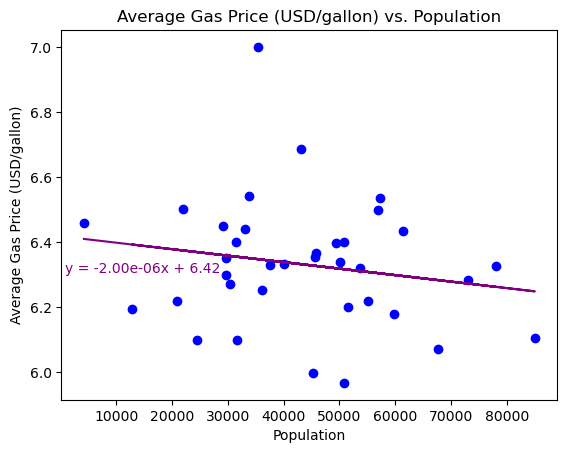

In [71]:
plt.scatter(gas_data_density_df['population'], gas_data_density_df['Regular avg'], c='blue')
plt.xlabel("Population")
plt.ylabel("Average Gas Price (USD/gallon)")
plt.title("Average Gas Price (USD/gallon) vs. Population")
population = linear_regression(gas_data_density_df["population"],gas_data_density_df["Regular avg"], "purple")
plt.figtext(.13,.375, population,fontsize=10,color="purple")
plt.show()

### 6. Average Gas Price vs. Median Household Income 

The r-squared is : 0.03


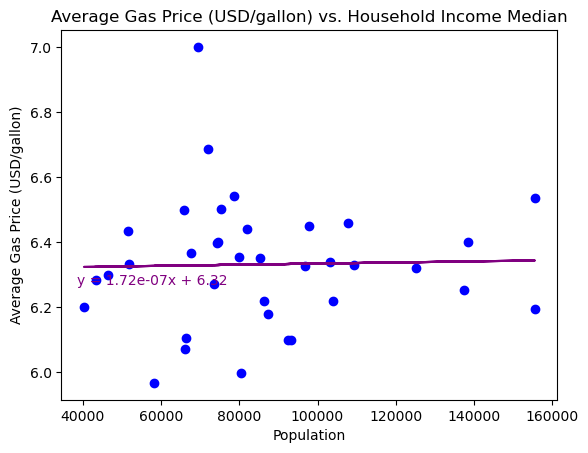

In [76]:
plt.scatter(gas_data_density_df['Household Income Median'], gas_data_density_df['Regular avg'], c='blue')
plt.xlabel("Population")
plt.ylabel("Average Gas Price (USD/gallon)")
plt.title("Average Gas Price (USD/gallon) vs. Median Household Income")
household_income = linear_regression(gas_data_density_df["Household Income Median"],gas_data_density_df["Regular avg"], "purple")
plt.figtext(.15,.35, household_income,fontsize=10,color="purple")
plt.show()